In [1]:
# import libraries for time series analysis such as statsmodels, pandas, and numpy
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Function

In [6]:
# Function to perform Augmented Dickey-Fuller test
def adf_test(series):
  result = adfuller(series)
  print(f'ADF Statistic: {result[0]:.6f}')
  print(f'p-value: {result[1]:.6f}')
  print('Critical Values:')
  for key, value in result[4].items():
    print(f'\t{key}: {value:.3f}')
  if result[1] <= 0.05:
    print("Reject the null hypothesis - the series is stationary")
  else:
    print("Fail to reject the null hypothesis - the series is non-stationary")

# Function to plot ACF and PACF
def plot_acf_pacf(series):
  fig, ax = plt.subplots(1, 2, figsize=(12, 5))
  ax[0].set_title('Autocorrelation Function')
  pd.plotting.autocorrelation_plot(series, ax=ax[0])
  ax[1].set_title('Partial Autocorrelation Function')
  pd.plotting.lag_plot(series, lag=1, ax=ax[1])
  plt.show()

# Function to decompose time series
def decompose_series(series, model='additive'):
  decomposition = seasonal_decompose(series, model=model)
  fig, ax = plt.subplots(4, 1, figsize=(10, 8))
  ax[0].plot(series, label='Original Series')
  ax[0].legend(loc='upper left')
  ax[1].plot(decomposition.trend, label='Trend')
  ax[1].legend(loc='upper left')
  ax[2].plot(decomposition.seasonal, label='Seasonal')
  ax[2].legend(loc='upper left')
  ax[3].plot(decomposition.resid, label='Residuals')
  ax[3].legend(loc='upper left')
  plt.tight_layout()
  plt.show()

# Main function to run the analysis
def main():
  # Load the time series data
  # Replace 'your_data.csv' with your actual data file
  df = pd.read_csv('your_data.csv', parse_dates=True, index_col='date')
  series = df['value']  # Replace 'value' with your actual column name

  # Perform ADF test
  print("Augmented Dickey-Fuller Test:")
  adf_test(series)

  # Plot ACF and PACF
  print("\nAutocorrelation and Partial Autocorrelation Plots:")
  plot_acf_pacf(series)

  # Decompose the time series
  print("\nDecomposing Time Series:")
  decompose_series(series)



# Example

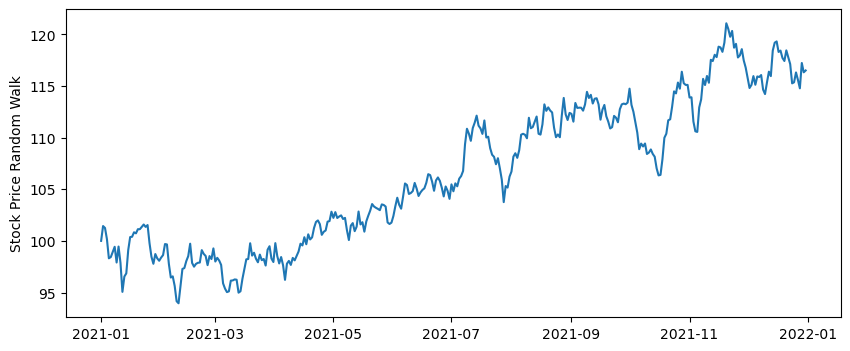

In [4]:
import random

df = pd.DataFrame({'Date': pd.date_range('2021-01-01', '2021-12-31', freq='D'),'Noise': [100]+[random.gauss(0, 1) for i in range(364)]})
df['Stock'] = df['Noise'].cumsum()
plt.figure(figsize=(10, 4))
plt.plot(df['Date'], df['Stock'])
plt.ylabel('Stock Price Random Walk')
plt.show()

In [5]:
# load the dataset
df = pd.read_csv('data/bikesharing.csv')
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
# insight 1: compute the monthly average temperature
monthly_temp = df.resample('ME')[['temp']].mean()
# insight 2: compute the daily sum of casual, register and total rentals
daily_rental = df.resample('D')[['casual', 'registered', 'cnt']].sum()
# insight 3: compute the monthly sum of total rentals in different weathers
monthly_total_rental_weather = df.groupby([pd.Grouper(freq='ME'), 'weather'])[['cnt']].sum()
# insight 4: what are the peak hours of bike rental for registered users and casual users, respectively?
df['hour'] = df.index.hour
peak_reg = df.groupby('hour')[['registered']].mean().sort_values('registered', ascending=False)
peak_cas = df.groupby('hour')[['casual']].mean().sort_values('casual', ascending=False)

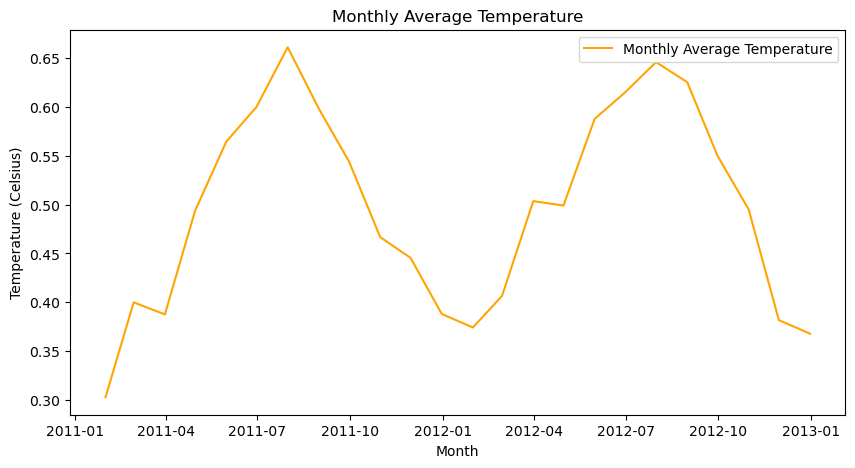

In [8]:
# do EDA for the bikesharing dataset
plt.figure(figsize=(10, 5))
plt.plot(monthly_temp.index, monthly_temp['temp'], label='Monthly Average Temperature', color='orange')
plt.title('Monthly Average Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()

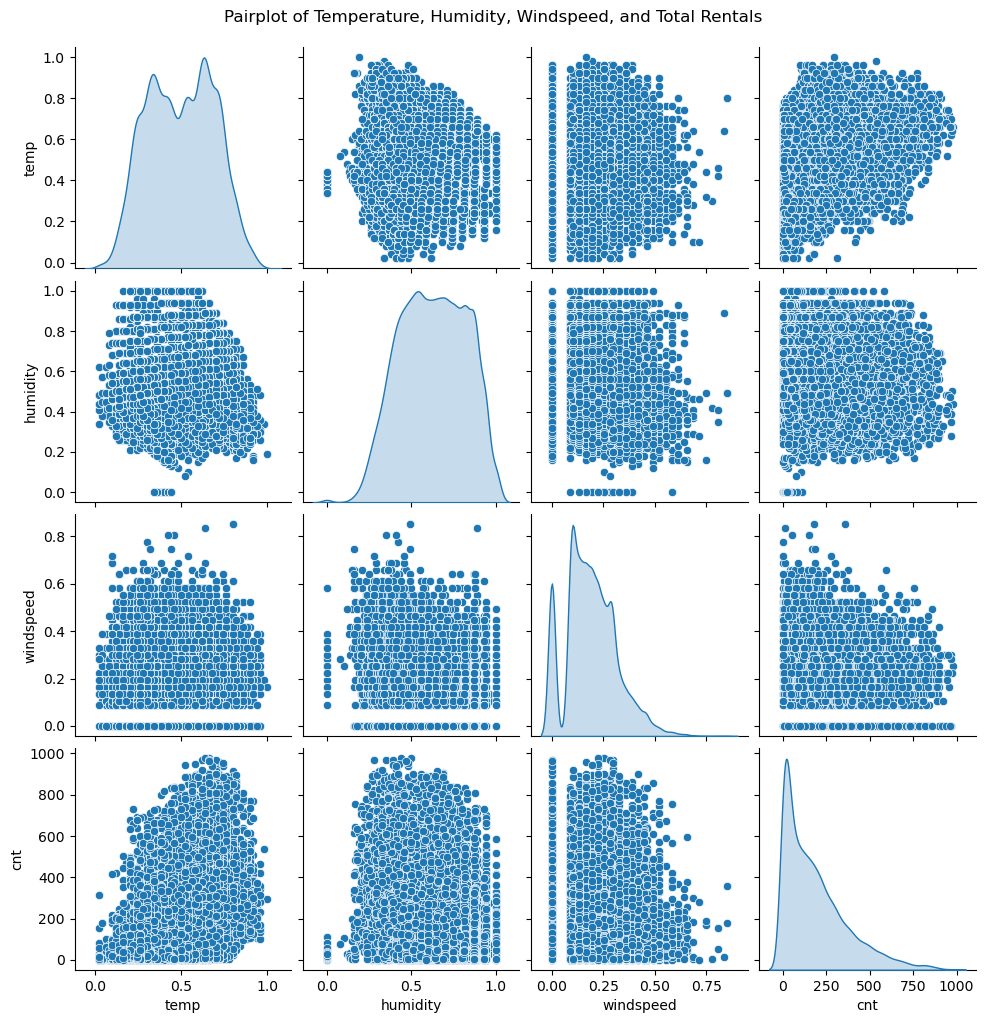

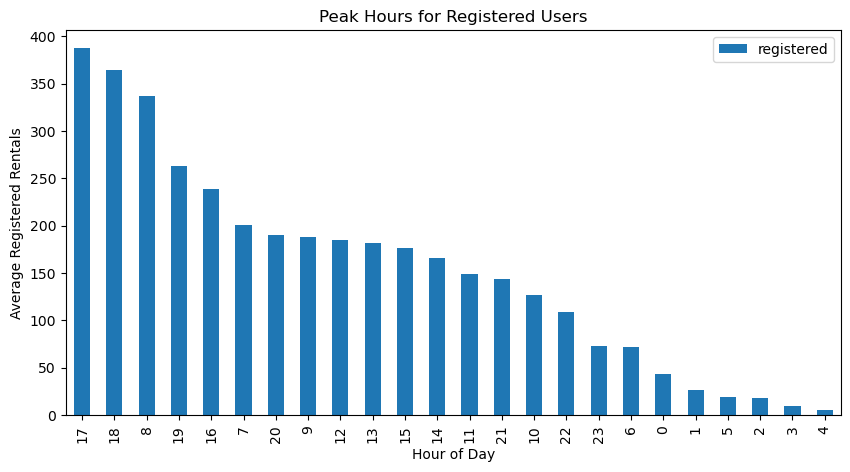

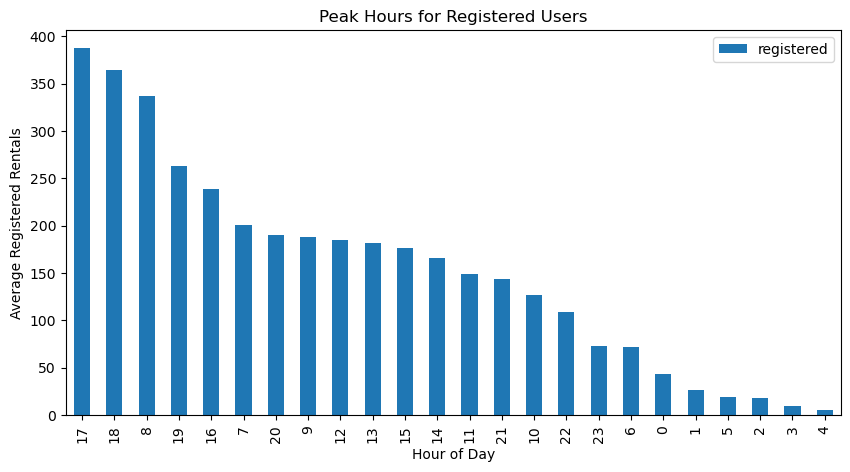

In [10]:
# pairplot 
import seaborn as sns
sns.pairplot(df[['temp', 'humidity', 'windspeed', 'cnt']], diag_kind='kde')
plt.suptitle('Pairplot of Temperature, Humidity, Windspeed, and Total Rentals', y=1.02)
plt.show()  
# plot the peak hours for registered users
peak_reg.plot(kind='bar', figsize=(10, 5), title='Peak Hours for Registered Users')
plt.xlabel('Hour of Day')
plt.ylabel('Average Registered Rentals')
plt.show()
# Example
peak_reg.plot(kind='bar', figsize=(10, 5), title='Peak Hours for Registered Users')
plt.xlabel('Hour of Day')
plt.ylabel('Average Registered Rentals')
plt.show()